In [1]:
#importing required packages

import uproot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from multiprocessing import Process
from skhep.math.vectors import LorentzVector, Vector3D

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

## Cuts

In [2]:
AND=" and ";   OR=" or ";   NOT=" not ";   cand0=" (__candidate__==0) ";   mycand=" (__candidate__==myBest) "
BpBmcut="( decayModeID==3005530 )";        B0B0cut="( decayModeID>=3005531 and decayModeID<=3005533 )"
roecuts="( nROE_Ch==0 and Eextra_ROE<1 )"
y4scuts="( cosBY0<1.1 and cosBY0>-1.9 and cosBY1<1.1 and cosBY1>-1.9 and (B0_decayModeID<500 or B1_decayModeID<500) )"
y4scuts_new = "( cosBY0<1.3 and cosBY0>-3.2 and cosBY1<1.1 and cosBY1>-1.9 )"
pipcut0="( (abs(pi4_B0_InvM-0.1395)<0.001 and pi4_1_B0_PDG!=22)"
pipcut1="( (abs(pi4_B1_InvM-0.1395)<0.001 and pi4_1_B1_PDG!=22)"
pipcut = '('+pipcut0 +OR+ pipcut1+')'
piptrue= '(('+pipcut0+AND+'(pi4_B0_isSignal==1))' +OR+ '('+pipcut1+AND+'(pi4_B1_isSignal==1))'+')'
pi0cut0="(abs(pi4_B0_InvM-0.135)<0.025 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0cut1="(abs(pi4_B1_InvM-0.135)<0.025 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0cut = '('+pi0cut0 +OR+ pi0cut1+')'
pi0wide0="(abs(pi4_B0_InvM-0.135)<0.050 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0wide1="(abs(pi4_B1_InvM-0.135)<0.050 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0wide = '('+pi0wide0 +OR+ pi0wide1+')'
pi0true0= '('+pi0wide0 +AND+ '(pi4_B0_isSignal==1)'+')'
pi0true1= '('+pi0wide1 +AND+ '(pi4_B1_isSignal==1)'+')'
pi0true = '('+pi0true0 +OR+ pi0true1+')'
pi0cutE0= '('+pi0cut0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0cutE1= '('+pi0cut1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0cutE = '('+pi0cutE0 +OR+ pi0cutE1+')'
pi0wideE0= '('+pi0wide0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0wideE1= '('+pi0wide1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0wideE = '('+pi0wideE0 +OR+ pi0wideE1+')'
pi0trueE0= '('+pi0true0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0trueE1= '('+pi0true1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0trueE = '('+pi0trueE0 +OR+ pi0trueE1+')'
etacut0 ="(abs(pi4_B0_InvM-0.547)<0.055 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etacut1 ="(abs(pi4_B1_InvM-0.547)<0.055 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etacut  = '('+etacut0 +OR+ etacut1+')'
etawide0="(abs(pi4_B0_InvM-0.547)<0.120 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etawide1="(abs(pi4_B1_InvM-0.547)<0.120 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etawide = '('+etawide0 +OR+ etawide1+')'
etatrue0= '('+etawide0 +AND+ '(pi4_B0_isSignal==1)'+')'
etatrue1= '('+etawide1 +AND+ '(pi4_B1_isSignal==1)'+')'
etatrue = '('+etatrue0 +OR+ etatrue1+')'

Bprec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1650)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1650)<60))"
B0rec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1450)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1450)<60))"

mcNBB = 180000 * 2. *199;   mclumi = mcNBB / 1100000.
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1')

Number of BB events (sum of B+B- and B0B0) = 7.164e+07
MC sample equivalent to 65.13 fb-1


## Data loading

### Cherged B mesons

In [3]:
def task():
    file_charged = uproot.open("DlDl_charged_gbasf2.root:Y4S")
    df_charged = pd.DataFrame()
    for batch in file_charged.iterate(step_size="100 MB", library='pd'):
        df_charged = df_charged.append(batch.query(BpBmcut+AND+roecuts+AND+Bprec_eta))
    df_charged

In [4]:
process = Process(target=task)

In [5]:
process.start()

In [6]:
# opening the gbasf2 charged root file
file_charged = uproot.open("DlDl_charged_gbasf2.root:Y4S")

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/sahargholipour/opt/anaconda3/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/sahargholipour/opt/anaconda3/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'task' on <module '__main__' (built-in)>


In [7]:
%%time
# removing some of the entries, keep charged B mesons + no charged particles in ROE + 
# Bs reconstructed as Dlnu and Detalnu
df_charged = pd.DataFrame()
for batch in file_charged.iterate(step_size="100 MB", library='pd'):
    df_charged = df_charged.append(batch.query(BpBmcut+AND+roecuts+AND+Bprec_eta))
df_charged

/Users/sahargholipour/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]


CPU times: user 5min 18s, sys: 41.1 s, total: 5min 59s
Wall time: 6min 46s


,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,...,MCGenPDG_45,MCGenMothIndex_45,MCGenPDG_46,MCGenMothIndex_46,MCGenPDG_47,MCGenMothIndex_47,MCGenPDG_48,MCGenMothIndex_48,MCGenPDG_49,MCGenMothIndex_49
21,1003,0,12624622,24816,0,5,1.0,10.579557,-1024.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1003,0,12624622,24816,2,5,1.0,10.579557,-1024.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,1003,0,12125220,24816,0,9,1.0,10.579557,-1021.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,1003,0,12125220,24816,1,9,1.0,10.579557,-1021.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,1003,0,12125220,24816,2,9,1.0,10.579557,-1021.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793481,1003,0,36952707,24820,4,6,1.0,10.579557,-3.0,1021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793482,1003,0,36952707,24820,5,6,1.0,10.579557,-3.0,1021.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793501,1003,0,37329964,24820,0,8,1.0,10.579557,-1002.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793502,1003,0,37329964,24820,1,8,1.0,10.579557,-1002.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mixed B mesons

In [8]:
file_mixed = uproot.open("DlDl_mixed_gbasf2.root:Y4S")

In [9]:
%%time
# removing some of the entries, keep mixed B mesons + no charged particles in ROE + 
# Bs reconstructed as Dlnu and Detalnu
df_mixed = pd.DataFrame()
for batch in file_mixed.iterate(step_size="100 MB", library='pd'):
    df_mixed = df_mixed.append(batch.query(B0B0cut+AND+roecuts+AND+B0rec_eta))
df_mixed

/Users/sahargholipour/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:805: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]


CPU times: user 2min 48s, sys: 24 s, total: 3min 12s
Wall time: 3min 55s


,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,...,MCGenPDG_45,MCGenMothIndex_45,MCGenPDG_46,MCGenMothIndex_46,MCGenPDG_47,MCGenMothIndex_47,MCGenPDG_48,MCGenMothIndex_48,MCGenPDG_49,MCGenMothIndex_49
130,1003,0,17159205,24821,0,4,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,1003,0,30101577,24821,0,6,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
922,1003,0,22628423,24821,0,3,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1144,1003,0,20482135,24821,0,6,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1145,1003,0,20482135,24821,1,6,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430606,1003,0,72016,25056,1,9,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430795,1003,0,878715,25056,0,6,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430798,1003,0,878715,25056,3,6,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
430837,1003,0,657322,25056,0,3,1.0,10.579557,-99.0,-99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Combining two data frames
frames = [df_charged, df_mixed]
Tree = pd.concat(frames, keys=['charged', 'mixed'])
Tree

__experiment__  __run__  __event__  __production__  \
charged 21                1003        0   12624622           24816   
        23                1003        0   12624622           24816   
        119               1003        0   12125220           24816   
        120               1003        0   12125220           24816   
        121               1003        0   12125220           24816   
...                        ...      ...        ...             ...   
mixed   430606            1003        0      72016           25056   
        430795            1003        0     878715           25056   
        430798            1003        0     878715           25056   
        430837            1003        0     657322           25056   
        430838            1003        0     657322           25056   

                __candidate__  __ncandidates__  __weight__       Ecms  \
charged 21                  0                5         1.0  10.579557   
        23                  2                5         1.0  10.579557   
        119                 0                9         1.0  10.579557   
        120                 1                9         1.0  10.579557   
        121                 2                9         1.0  10.579557   
...                       ...              ...         ...        ...   
mixed   430606              1                9         1.0  10.579557   
        430795              0                6         1.0  10.579557   
        430798              3                6         1.0  10.579557   
        430837              0                3         1.0  10.579557   
        430838              1                3         1.0  10.579557   

                aBminusMode  aBplusMode  ...  MCGenPDG_45  MCGenMothIndex_45  \
charged 21          -1024.0      1001.0  ...          NaN                NaN   
        23          -1024.0      1001.0  ...          NaN                NaN   
        119         -1021.0      1001.0  ...          NaN                NaN   
        120         -1021.0      1001.0  ...          NaN                NaN   
        121         -1021.0      1001.0  ...          NaN                NaN   
...                     ...         ...  ...          ...                ...   
mixed   430606        -99.0       -99.0  ...          NaN                NaN   
        430795        -99.0       -99.0  ...          NaN                NaN   
        430798        -99.0       -99.0  ...          NaN                NaN   
        430837        -99.0       -99.0  ...          NaN                NaN   
        430838        -99.0       -99.0  ...          NaN                NaN   

                MCGenPDG_46  MCGenMothIndex_46  MCGenPDG_47  \
charged 21              NaN                NaN          NaN   
        23              NaN                NaN          NaN   
        119             NaN                NaN          NaN   
        120             NaN                NaN          NaN   
        121             NaN                NaN          NaN   
...                     ...                ...          ...   
mixed   430606          NaN                NaN          NaN   
        430795          NaN                NaN          NaN   
        430798          NaN                NaN          NaN   
        430837          NaN                NaN          NaN   
        430838          NaN                NaN          NaN   

                MCGenMothIndex_47  MCGenPDG_48  MCGenMothIndex_48  \
charged 21                    NaN          NaN                NaN   
        23                    NaN          NaN                NaN   
        119                   NaN          NaN                NaN   
        120                   NaN          NaN                NaN   
        121                   NaN          NaN                NaN   
...                           ...          ...                ...   
mixed   430606                NaN          NaN                NaN   
        430795              

In [11]:
df_mixed['decayModeID'].value_counts()

3005531.0    2456
3005533.0     694
3005532.0     599
Name: decayModeID, dtype: int64

In [12]:
#Note: be careful this list of eta modes doesn't have some of the modes like 301019
etamodesBp = list((1019,1020,1039,1040,101019,101020,101039,101040,201019,201020,201039,201040))
etamodesBm = [-x for x in etamodesBp]
etamodesBpBm = etamodesBp + etamodesBm

etamodesB0 = list((1017,1018,1035,1036,101017,101018,101035,101036,201017,201018,201035,201036))
etamodesB0bar = [-x for x in etamodesB0]
etamodesB0B0 = etamodesB0 + etamodesB0bar

print(f'{-101019 in etamodesBpBm}  {1002 in etamodesB0B0}')
geneta=f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) )'

True  False


# Functions

In [13]:
# function of counting signal and background for both my signal and basf2 signal
# Note: n for charged B mesons is 3005530 and for mixed B mesons any integers work
def sig_bkg_counter(n,list_cut):
    n_sig, n_bkg, n_phgbkg= (np.zeros(len(list_cut)) for n_d in range(3))
    datas = []
    cut=0
    print('{:>13s}{:>14s}{:>10s}{:>15s}{:>15s}{:>15s}{:>10s}{:>20s}'.format('length','total_sigbkg','n_signal','n_background','significance','efficiency','p','peaking_bkg'))
    print('my \nisSignal')
    
    if n==3005530:
        for data in list_cut:
            ns, nb, n_pk = (0 for n in range(3))
            df_sig, df_bkg, df_pkgbkg = (pd.DataFrame() for n_df in range(3))
            for i in range(len(data)):
                if ( ((data['aBplusMode'].iloc[i])%10000 in [1019,1020,1039,1040]) | (abs(data['aBminusMode'].iloc[i])%10000 in [1019,1020,1039,1040]) ) and ( (data['pi4_B0_isSignal'].iloc[i]==1) | (data['pi4_B1_isSignal'].iloc[i]==1) ):
                    ns += 1
                    df_sig = df_sig.append(pd.DataFrame([data.iloc[i]],index=['signal'],columns=data.columns))
                else:
                    nb += 1
                    df_bkg = df_bkg.append(pd.DataFrame([data.iloc[i]],index=['background'],columns=data.columns))
                if ( ((data['aBplusMode'].iloc[i])%10000 not in [1019,1020,1039,1040]) & (abs(data['aBminusMode'].iloc[i])%10000 not in [1019,1020,1039,1040]) ) and ( (data['pi4_B0_isSignal'].iloc[i]==1) | (data['pi4_B1_isSignal'].iloc[i]==1) ):
                    df_pkgbkg = df_pkgbkg.append(pd.DataFrame([data.iloc[i]],index=['peaking background'],columns=data.columns))
                    n_pk += 1
            n_sig[cut] = ns
            n_bkg[cut] = nb
            n_phgbkg[cut] = n_pk
            datas.append(pd.concat([df_sig, df_bkg]))
            print('-'*116)
            print(f'cut{cut}:{len(data):6} {int(n_sig[cut]+n_bkg[cut]):10} {int(n_sig[cut]):12} {int(n_bkg[cut]):12} {n_sig[cut]/(pow((n_sig[cut]+n_bkg[cut]),0.5)):13.2f} {n_sig[cut]/(n_sig[0]):17.4f} {(n_sig[cut]/(n_sig[0]))/(1+pow(n_bkg[cut],0.5)):15.6f} {int(n_phgbkg[cut]):10}')
            cut += 1
        
    else:
        for data in list_cut:
            ns, nb, n_pk = (0 for n in range(3))
            df_sig, df_bkg, df_pkgbkg = (pd.DataFrame() for n_df in range(3))
            for i in range(len(data)):
                if ( ((data['aB0Mode'].iloc[i])%10000 in [1017,1018,1035,1036]) | (abs(data['aBbar0Mode'].iloc[i])%10000 in [1017,1018,1035,1036]) ):
                    ns += 1
                    df_sig = df_sig.append(pd.DataFrame([data.iloc[i]],index=['signal'],columns=data.columns))
                else:
                    nb += 1
                    df_bkg = df_bkg.append(pd.DataFrame([data.iloc[i]],index=['background'],columns=data.columns))
                if ( ((data['aB0Mode'].iloc[i])%10000 not in [1017,1018,1035,1036]) & (abs(data['aBbar0Mode'].iloc[i])%10000 not in [1017,1018,1035,1036]) ) and ( (data['pi4_B0_isSignal'].iloc[i]==1) | (data['pi4_B1_isSignal'].iloc[i]==1) ):
                    df_pkgbkg = df_pkgbkg.append(pd.DataFrame([data.iloc[i]],index=['peaking background'],columns=data.columns))
                    n_pk += 1
            n_sig[cut] = ns
            n_bkg[cut] = nb
            n_phgbkg[cut] = n_pk
            datas.append(pd.concat([df_sig, df_bkg]))
            print('-'*116)
            print(f'cut{cut}:{len(data):6} {int(n_sig[cut]+n_bkg[cut]):10} {int(n_sig[cut]):12} {int(n_bkg[cut]):12} {n_sig[cut]/(pow((n_sig[cut]+n_bkg[cut]),0.5)):13.2f} {n_sig[cut]/(n_sig[0]):17.4f} {(n_sig[cut]/(n_sig[0]))/(1+pow(n_bkg[cut],0.5)):15.6f} {int(n_phgbkg[cut]):10}')
            cut += 1
    
    n_sig= np.zeros(7)
    n_bkg= np.zeros(7)
    cut=0
    print('*'*116)
    print('basf2 \nisSignal')
    for data in list_cut:
        ns, nb, n_pk = (0 for n in range(3))
        for i in range(len(data)):
            if data['isSignal'].iloc[i]==1:
                ns += 1
            else:
                nb += 1
            if (data['isSignal'].iloc[i]!=1) & ((data['pi4_B0_isSignal'].iloc[i]==1) | (data['pi4_B1_isSignal'].iloc[i]==1)):
                n_pk += 1 
        n_sig[cut] = ns
        n_bkg[cut] = nb
        n_phgbkg[cut] = n_pk
        print('-'*116)
        print(f'cut{cut}:{len(data):6} {int(n_sig[cut]+n_bkg[cut]):10} {int(n_sig[cut]):12} {int(n_bkg[cut]):12} {n_sig[cut]/(pow((n_sig[cut]+n_bkg[cut]),0.5)):13.2f} {n_sig[cut]/(n_sig[0]):17.4f} {(n_sig[cut]/(n_sig[0]))/(1+pow(n_bkg[cut],0.5)):15.6f} {int(n_phgbkg[cut]):10}')
        cut += 1
    
    Tree_cuts = pd.concat(datas, keys=[f'cut{i}' for i in range(len(list_cut))])
    return Tree_cuts
    

In [14]:
# sum function of list elements
l = [1, 2, 3, 4, 5]
def sum_of_list(l):
  total = 0
  for val in l:
    total = total + val
  return total
sum_of_list(l[:])

15

In [15]:
# the function of getting ratio in each window of histogram, and plot the significance
# Note: the histtype should be barstacked
def get_x_ratio(width_list, bin_count):
    x_values_full, ratio_full, significance_full = ({} for n_d in range(3))
    
    for width in width_list:
        x_value, ratio, significance = ([] for n_l in range(3))
        
        for i in range(len(bin_count[0])):
            if i+width > len(bin_count[0]) :
                break
            else:
                n_sig = sum_of_list(bin_count[1][i:i+width]-bin_count[0][i:i+width])
                n_bkg = sum_of_list(bin_count[0][i:i+width])
                if (n_sig+n_bkg) < 200:
                    significance.append(np.nan)
                else:
                    if n_bkg==0:
                        pass
                    else:
                        #x_value.append((i+(i+width))/2)
                        x_value.append(i)
                        ratio.append(n_sig/n_bkg)
                        significance.append(n_sig/pow((n_sig+n_bkg), 0.5))

        x_values_full[width] = x_value
        ratio_full[width] = ratio
        significance_full[width] = significance
#         show = plt.scatter(bin_edges[], significance_full[width], label=[f'{width}'])
#         plt.xlabel('x_value')
#         plt.ylabel('significance')
        
    return x_values_full, significance_full, ratio_full #, show



# print(x_values_full)
# print(x_values_full[12])


# x_values_full, ratio_full = get_x_ratio([10,11,12])
# plt.plot(x_values_full[10], ratio_full[10])

# for key, value in x_values_full.items():
#     print(f"width is {key}, xvalues is {value}")

# x_values_full

In [44]:
# get different ranges
def x_ranges(window_list, x_from_get_x_ratio, bin_edges_list):
    data = {}
    for width in window_list:
        ranges = []
        for i in range(len(x_from_get_x_ratio[width])):
            start_bin = x_from_get_x_ratio[width][i]
            end_bin = x_from_get_x_ratio[width][i] + width
            ranges.append(f'{bin_edges_list[start_bin]:.2f} - {bin_edges_list[end_bin]:.2f}')
        data[width] = ranges
    return data

In [57]:
dic = {'a':[1,7,3], 'b':[3,5,6]}
max(dic)

'b'

In [ ]:
def GetMax(flows):        
    maks=max(flows.items(), key=lambda k: len(flows[k]))
    return len(flows[maks]), maks

In [55]:
# get longest element in the dictionary
def GetMaxFlow(flows):        
    maks=max(flows, key=lambda k: len(flows[k]))
    return len(flows[maks]), maks

GetMaxFlow(dic)

(3, 'a')

# Analysis

$B^+B^-$

In [20]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B plus meaning I chose for one of them only Dlnu then the other one to be D(*)0etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [300, 400]
# add this cut later: samplesBp1 = aTree.query(mycand+AND+BpBmcut+AND+Bprec_eta)

samplesBp0 = Tree.loc['charged'].query(cand0)
samplesBp1 = Tree.loc['charged'].query(cand0+AND+etacut)
samplesBp2 = Tree.loc['charged'].query(cand0+AND+y4scuts)
samplesBp3 = Tree.loc['charged'].query(cand0+AND+y4scuts_new)
samplesBp4 = Tree.loc['charged'].query(cand0+AND+y4scuts+AND+etacut)
samplesBp_cuts = [samplesBp0, samplesBp1, samplesBp2, samplesBp3, samplesBp4]

In [21]:
tree_p = sig_bkg_counter(3005530,samplesBp_cuts)

       length  total_sigbkg  n_signal   n_background   significance     efficiency         p         peaking_bkg
my 
isSignal
--------------------------------------------------------------------------------------------------------------------
cut0:  3896       3896          480         3416          7.69            1.0000        0.016822        175
--------------------------------------------------------------------------------------------------------------------
cut1:  3803       3803          479         3324          7.77            0.9979        0.017014        174
--------------------------------------------------------------------------------------------------------------------
cut2:  2441       2441          392         2049          7.93            0.8167        0.017652        123
--------------------------------------------------------------------------------------------------------------------
cut3:  2833       2833          423         2410          7.95            0.8812  

In [22]:
tree_p

__experiment__  __run__   __event__  __production__  \
cut0 signal              1003.0      0.0  11916538.0         24816.0   
     signal              1003.0      0.0  16764827.0         24816.0   
     signal              1003.0      0.0  11000768.0         24816.0   
     signal              1003.0      0.0  11619061.0         24816.0   
     signal              1003.0      0.0  34786670.0         24816.0   
...                         ...      ...         ...             ...   
cut4 background          1003.0      0.0  80376579.0         24820.0   
     background          1003.0      0.0  74601352.0         24820.0   
     background          1003.0      0.0  84372463.0         24820.0   
     background          1003.0      0.0  89998821.0         24820.0   
     background          1003.0      0.0  44658980.0         24820.0   

                 __candidate__  __ncandidates__  __weight__       Ecms  \
cut0 signal                0.0              9.0         1.0  10.579557   
     signal                0.0              9.0         1.0  10.579557   
     signal                0.0              4.0         1.0  10.579557   
     signal                0.0              9.0         1.0  10.579557   
     signal                0.0              9.0         1.0  10.579557   
...                        ...              ...         ...        ...   
cut4 background            0.0              9.0         1.0  10.579557   
     background            0.0              9.0         1.0  10.579557   
     background            0.0              9.0         1.0  10.579557   
     background            0.0              2.0         1.0  10.579557   
     background            0.0              4.0         1.0  10.579557   

                 aBminusMode  aBplusMode  ...  MCGenPDG_45  MCGenMothIndex_45  \
cut0 signal          -1001.0      1020.0  ...          NaN                NaN   
     signal          -1002.0      1040.0  ...          NaN                NaN   
     signal          -1002.0      1020.0  ...          NaN                NaN   
     signal          -1039.0    101001.0  ...          NaN                NaN   
     signal        -101020.0      1001.0  ...          NaN                NaN   
...                      ...         ...  ...          ...                ...   
cut4 background    -101001.0      1021.0  ...          NaN                NaN   
     background      -1021.0      1001.0  ...          NaN                NaN   
     background    -201001.0      1021.0  ...          NaN                NaN   
     background      -1001.0      1026.0  ...          NaN                NaN   
     background    -201002.0      1002.0  ...          NaN                NaN   

                 MCGenPDG_46  MCGenMothIndex_46  MCGenPDG_47  \
cut0 signal              NaN                NaN          NaN   
     signal              NaN                NaN          NaN   
     signal              NaN                NaN          NaN   
     signal              NaN                NaN          NaN   
     signal              NaN                NaN          NaN   
...                      ...                ...          ...   
cut4 background          NaN                NaN          NaN   
     background          NaN                NaN          NaN   
     background          NaN                NaN          NaN   
     background          NaN                NaN          NaN   
     background          NaN                NaN          NaN   

                 MCGenMothIndex_47  MCGenPDG_48  MCGenMothIndex_48  \
cut0 signal                    NaN          NaN                NaN   
     signal                    NaN          NaN                NaN   
     signal                    NaN          NaN                NaN   
     signal                    NaN          NaN                NaN   
     signal                    NaN          NaN                NaN   
...                            ...          ...                ...   
cut4 background                

In [23]:
tree_p.loc['cut0'].loc['background']

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,...,MCGenPDG_45,MCGenMothIndex_45,MCGenPDG_46,MCGenMothIndex_46,MCGenPDG_47,MCGenMothIndex_47,MCGenPDG_48,MCGenMothIndex_48,MCGenPDG_49,MCGenMothIndex_49
background,1003.0,0.0,12624622.0,24816.0,0.0,5.0,1.0,10.579557,-1024.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
background,1003.0,0.0,12125220.0,24816.0,0.0,9.0,1.0,10.579557,-1021.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
background,1003.0,0.0,15881049.0,24816.0,0.0,6.0,1.0,10.579557,-101005.0,301002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
background,1003.0,0.0,20313137.0,24816.0,0.0,3.0,1.0,10.579557,-1002.0,1681.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
background,1003.0,0.0,9376399.0,24816.0,0.0,4.0,1.0,10.579557,-101001.0,1022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
background,1003.0,0.0,99744086.0,24820.0,0.0,9.0,1.0,10.579557,-1001.0,1039.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
background,1003.0,0.0,90863140.0,24820.0,0.0,4.0,1.0,10.579557,-101001.0,1001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
background,1003.0,0.0,4074458.0,24820.0,0.0,4.0,1.0,10.579557,-1021.0,1765.0,...,NaN,NaN,211.0,39.0,-211.0,39.0,NaN,NaN,NaN,NaN
background,1003.0,0.0,44658980.0,24820.0,0.0,4.0,1.0,10.579557,-201002.0,1002.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$B^0\bar{B0}$

In [24]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B zero meaning I chose for one of them only Dlnu then the other one to be D(*)-etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [100, 200]

samplesBz0 = Tree.loc['mixed'].query(cand0)
samplesBz1 = Tree.loc['mixed'].query(cand0+AND+etacut)
samplesBz2 = Tree.loc['mixed'].query(cand0+AND+y4scuts)
samplesBz3 = Tree.loc['mixed'].query(cand0+AND+y4scuts_new)
samplesBz4 = Tree.loc['mixed'].query(cand0+AND+y4scuts+AND+etacut)
samplesBz_cuts = [samplesBz0, samplesBz1, samplesBz2, samplesBz3, samplesBz4]

In [25]:
tree0 = sig_bkg_counter(1,samplesBz_cuts)

       length  total_sigbkg  n_signal   n_background   significance     efficiency         p         peaking_bkg
my 
isSignal
--------------------------------------------------------------------------------------------------------------------
cut0:  1015       1015          176          839          5.52            1.0000        0.033372         58
--------------------------------------------------------------------------------------------------------------------
cut1:   979        979          174          805          5.56            0.9886        0.033659         57
--------------------------------------------------------------------------------------------------------------------
cut2:   672        672          151          521          5.82            0.8580        0.036010         44
--------------------------------------------------------------------------------------------------------------------
cut3:   762        762          160          602          5.80            0.9091  

In [26]:
tree0

__experiment__  __run__   __event__  __production__  \
cut0 signal              1003.0      0.0  25578865.0         24821.0   
     signal              1003.0      0.0  26972848.0         24821.0   
     signal              1003.0      0.0  19000972.0         24821.0   
     signal              1003.0      0.0  28863525.0         24821.0   
     signal              1003.0      0.0  23025879.0         24821.0   
...                         ...      ...         ...             ...   
cut4 background          1003.0      0.0  95991720.0         24825.0   
     background          1003.0      0.0  76464541.0         24825.0   
     background          1003.0      0.0    625181.0         25056.0   
     background          1003.0      0.0    878715.0         25056.0   
     background          1003.0      0.0    657322.0         25056.0   

                 __candidate__  __ncandidates__  __weight__       Ecms  \
cut0 signal                0.0              1.0         1.0  10.579557   
     signal                0.0              9.0         1.0  10.579557   
     signal                0.0              7.0         1.0  10.579557   
     signal                0.0              9.0         1.0  10.579557   
     signal                0.0              9.0         1.0  10.579557   
...                        ...              ...         ...        ...   
cut4 background            0.0              4.0         1.0  10.579557   
     background            0.0              9.0         1.0  10.579557   
     background            0.0              3.0         1.0  10.579557   
     background            0.0              6.0         1.0  10.579557   
     background            0.0              3.0         1.0  10.579557   

                 aBminusMode  aBplusMode  ...  MCGenPDG_45  MCGenMothIndex_45  \
cut0 signal            -99.0       -99.0  ...          NaN                NaN   
     signal            -99.0       -99.0  ...          NaN                NaN   
     signal            -99.0       -99.0  ...          NaN                NaN   
     signal            -99.0       -99.0  ...          NaN                NaN   
     signal            -99.0       -99.0  ...          NaN                NaN   
...                      ...         ...  ...          ...                ...   
cut4 background        -99.0       -99.0  ...          NaN                NaN   
     background        -99.0       -99.0  ...          NaN                NaN   
     background        -99.0       -99.0  ...        111.0               24.0   
     background        -99.0       -99.0  ...          NaN                NaN   
     background        -99.0       -99.0  ...          NaN                NaN   

                 MCGenPDG_46  MCGenMothIndex_46  MCGenPDG_47  \
cut0 signal              NaN                NaN          NaN   
     signal              NaN                NaN          NaN   
     signal              NaN                NaN          NaN   
     signal              NaN                NaN          NaN   
     signal              NaN                NaN          NaN   
...                      ...                ...          ...   
cut4 background          NaN                NaN          NaN   
     background          NaN                NaN          NaN   
     background          NaN                NaN          NaN   
     background          NaN                NaN          NaN   
     background          NaN                NaN          NaN   

                 MCGenMothIndex_47  MCGenPDG_48  MCGenMothIndex_48  \
cut0 signal                    NaN          NaN                NaN   
     signal                    NaN          NaN                NaN   
     signal                    NaN          NaN                NaN   
     signal                    NaN          NaN                NaN   
     signal                    NaN          NaN                NaN   
...                            ...          ...                ...   
cut4 background                

#### Why isSignal is too strict

In [27]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 868)

samplesBp0.query('(isSignal!=1) and ( (aBplusMode%10000 in [1019,1020,1039,1040]) or (aBminusMode%10000 in [1019,1020,1039,1040]) )')

__experiment__  __run__  __event__  __production__  __candidate__  \
1400              1003        0   11916538           24816              0   
2836              1003        0   12453494           24816              0   
3770              1003        0   16764827           24816              0   
4826              1003        0   11000768           24816              0   
7729              1003        0   18713452           24816              0   
...                ...      ...        ...             ...            ...   
777510            1003        0   76797658           24820              0   
779564            1003        0   95353731           24820              0   
781730            1003        0   92046949           24820              0   
785943            1003        0   90651967           24820              0   
792937            1003        0   99744086           24820              0   

        __ncandidates__  __weight__       Ecms  aBminusMode  aBplusMode  \
1400                  9         1.0  10.579557      -1001.0      1020.0   
2836                  9         1.0  10.579557    -101021.0      1019.0   
3770                  9         1.0  10.579557      -1002.0      1040.0   
4826                  4         1.0  10.579557      -1002.0      1020.0   
7729                  2         1.0  10.579557      -1021.0      1020.0   
...                 ...         ...        ...          ...         ...   
777510                9         1.0  10.579557      -1002.0      1020.0   
779564                9         1.0  10.579557    -101001.0      1019.0   
781730                9         1.0  10.579557      -1001.0      1039.0   
785943                2         1.0  10.579557      -1021.0    101020.0   
792937                9         1.0  10.579557      -1001.0      1039.0   

        aB0Mode  aBbar0Mode  aDstminusMode  aDstplusMode  aDminusMode  \
1400      -99.0       -99.0          -99.0         -99.0        -99.0   
2836      -99.0       -99.0          -99.0         -99.0        -99.0   
3770      -99.0       -99.0          -99.0         -99.0        -99.0   
4826      -99.0       -99.0          -99.0         -99.0        -99.0   
7729      -99.0       -99.0          -99.0         -99.0        -99.0   
...         ...         ...            ...           ...          ...   
777510    -99.0       -99.0          -99.0         -99.0        -99.0   
779564    -99.0       -99.0          -99.0         -99.0        -99.0   
781730    -99.0       -99.0          -99.0         -99.0        -99.0   
785943    -99.0       -99.0          -99.0         -99.0        -99.0   
792937    -99.0       -99.0          -99.0         -99.0        -99.0   

        aDplusMode   aD0Mode  aDbar0Mode       ECM       pCM      InvM  \
1400         -99.0    1036.0     -1034.0  9.015744  1.603376  8.869189   
2836         -99.0    1017.0   -101036.0  8.347405  0.982191  8.287337   
3770         -99.0  101017.0     -1032.0  8.866046  1.250723  8.788847   
4826         -99.0       4.0     -1017.0  8.571107  1.123278  8.660967   
7729         -99.0    1036.0     -1017.0  8.663444  0.955214  8.610124   
...            ...       ...         ...       ...       ...       ...   
777510       -99.0    1036.0     -1032.0  8.863105  1.373804  8.754755   
779564       -99.0    1054.0     -1036.0  9.542159  0.677475  9.516867   
781730       -99.0    1036.0     -1036.0  9.226527  2.242478  8.949663   
785943       -99.0    1036.0     -1036.0  8.513942  1.207325  8.423284   
792937       -99.0    1036.0     -1032.0  8.556009  1.554959  8.413457   

         cosThCM     phiCM     PDG  nROE_Ch  nROE_ECL  nROE_KL  nROE_gam  \
1400   -0.881740 -0.771665  300553      0.0       5.0      0.0       5.0   
2836    0.250459 -3.138339  300553      0.0       3.0      0.0       3.0   
3770   -0.713717 -0.898566  300553      0.0       1.0      0.0       1.0   
4826    0.826167 -0.190700  300553      0.0       5.0      1.0       5.0   
7729   -0.268850 -2.367619  300553  

In [28]:
samplesBp0.query('(isSignal!=1) and (nROE_Ch==1) and ( (aBplusMode%10000 in [1019,1020,1039,1040]) or (aBminusMode%10000 in [1019,1020,1039,1040]) )')

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,aBminusMode,aBplusMode,aB0Mode,aBbar0Mode,aDstminusMode,aDstplusMode,aDminusMode,aDplusMode,aD0Mode,aDbar0Mode,ECM,pCM,InvM,cosThCM,phiCM,PDG,nROE_Ch,nROE_ECL,nROE_KL,nROE_gam,Q_ROE,M_ROE,Eextra_ROE,R2,cosTBTO,M_roepi0,pCM_roepi0,phiCM_roepi0,cosThCM_roepi0,ECM_roegam,phiCM_roegam,cosThCM_roegam,pCM_roepi,phiCM_roepi,cosThCM_roepi,q_roepi,isSignal,Y4Sprod,Y4Sproduct,Y4SScore,Y4SScore4,decayModeID,cosBY0,cosBY1,cosDel,cosDelRange,B0_ECM,B0_pCM,B0_InvM,B0_cosThCM,B0_phiCM,B0_PDG,B0_BchiProb,B0_BflightDistance,B0_BflightDistanceErr,B0_B_dr,B0_B_dz,B0_B_x,B0_B_y,B0_B_z,B0_B_x_uncertainty,B0_B_y_uncertainty,B0_B_z_uncertainty,B0_isSignal,B0_mcErrors,B0_mcPDG,B0_genMotherID_0,B0_genMotherPDG_0,B0_genMotherPDG_1,B0_isSignalAcceptMissing,B0_decayModeID,B0_cosBY,B0_Pi0orEtaScore,B1_ECM,B1_pCM,B1_InvM,B1_cosThCM,B1_phiCM,B1_PDG,B1_BchiProb,B1_BflightDistance,B1_BflightDistanceErr,B1_B_dr,B1_B_dz,B1_B_x,B1_B_y,B1_B_z,B1_B_x_uncertainty,B1_B_y_uncertainty,B1_B_z_uncertainty,B1_isSignal,B1_mcErrors,B1_mcPDG,B1_genMotherID_0,B1_genMotherPDG_0,B1_genMotherPDG_1,B1_isSignalAcceptMissing,B1_decayModeID,B1_cosBY,B1_Pi0orEtaScore,e_B0_ECM,e_B0_pCM,e_B0_InvM,e_B0_cosThCM,e_B0_phiCM,e_B0_PDG,e_B0_isSignal,e_B0_mcErrors,e_B0_mcPDG,e_B0_genMotherID_0,e_B0_genMotherPDG_0,e_B0_genMotherPDG_1,e_B0_isSignalAcceptMissing,e_B0_electronID,e_B0_muonID,e_B1_ECM,e_B1_pCM,e_B1_InvM,e_B1_cosThCM,e_B1_phiCM,e_B1_PDG,e_B1_isSignal,e_B1_mcErrors,e_B1_mcPDG,e_B1_genMotherID_0,e_B1_genMotherPDG_0,e_B1_genMotherPDG_1,e_B1_isSignalAcceptMissing,e_B1_electronID,e_B1_muonID,D_B0_ECM,D_B0_pCM,D_B0_InvM,D_B0_cosThCM,D_B0_phiCM,D_B0_PDG,D_B0_BFInvM,D_B0_DchiProb,D_B0_DflightDistance,D_B0_DflightDistanceErr,D_B0_mcECM,D_B0_mcPCM,D_B0_mcThetaCM,D_B0_mcPhiCM,D_B0_isSignal,D_B0_mcErrors,D_B0_mcPDG,D_B0_genMotherID_0,D_B0_genMotherPDG_0,D_B0_genMotherPDG_1,D_B0_genMotherPDG_2,D_B0_isSignalAcceptMissing,D_B0_decayModeID,D_B1_ECM,D_B1_pCM,D_B1_InvM,D_B1_cosThCM,D_B1_phiCM,D_B1_PDG,D_B1_BFInvM,D_B1_DchiProb,D_B1_DflightDistance,D_B1_DflightDistanceErr,D_B1_mcECM,D_B1_mcPCM,D_B1_mcThetaCM,D_B1_mcPhiCM,D_B1_isSignal,D_B1_mcErrors,D_B1_mcPDG,D_B1_genMotherID_0,D_B1_genMotherPDG_0,D_B1_genMotherPDG_1,D_B1_genMotherPDG_2,D_B1_isSignalAcceptMissing,D_B1_decayModeID,D_0_B0_ECM,D_0_B0_pCM,D_0_B0_InvM,D_0_B0_cosThCM,D_0_B0_phiCM,D_0_B0_PDG,D_0_B0_BFInvM,D_0_B0_DchiProb,D_0_B0_DflightDistance,D_0_B0_DflightDistanceErr,D_0_B0_mcECM,D_0_B0_mcPCM,D_0_B0_mcThetaCM,D_0_B0_mcPhiCM,D_0_B0_isSignal,D_0_B0_mcErrors,D_0_B0_mcPDG,D_0_B0_genMotherID_0,D_0_B0_genMotherPDG_0,D_0_B0_genMotherPDG_1,D_0_B0_genMotherPDG_2,D_0_B0_isSignalAcceptMissing,D_0_B0_decayModeID,D_0_0_B0_ECM,D_0_0_B0_pCM,D_0_0_B0_InvM,D_0_0_B0_cosThCM,D_0_0_B0_phiCM,D_0_0_B0_PDG,D_0_0_B0_mcECM,D_0_0_B0_mcPCM,D_0_0_B0_mcThetaCM,D_0_0_B0_mcPhiCM,D_0_0_B0_isSignal,D_0_0_B0_mcErrors,D_0_0_B0_mcPDG,D_0_0_B0_genMotherID_0,D_0_0_B0_genMotherPDG_0,D_0_0_B0_genMotherPDG_1,D_0_0_B0_genMotherPDG_2,D_0_0_B0_isSignalAcceptMissing,D_0_0_0_B0_ECM,D_0_0_0_B0_pCM,D_0_0_0_B0_InvM,D_0_0_0_B0_cosThCM,D_0_0_0_B0_phiCM,D_0_0_0_B0_PDG,D_0_0_0_B0_mcECM,D_0_0_0_B0_mcPCM,D_0_0_0_B0_mcThetaCM,D_0_0_0_B0_mcPhiCM,D_0_0_0_B0_isSignal,D_0_0_0_B0_mcErrors,D_0_0_0_B0_mcPDG,D_0_0_0_B0_genMotherID_0,D_0_0_0_B0_genMotherPDG_0,D_0_0_0_B0_genMotherPDG_1,D_0_0_0_B0_genMotherPDG_2,D_0_0_0_B0_isSignalAcceptMissing,D_0_0_1_B0_ECM,D_0_0_1_B0_pCM,D_0_0_1_B0_InvM,D_0_0_1_B0_cosThCM,D_0_0_1_B0_phiCM,D_0_0_1_B0_PDG,D_0_0_1_B0_mcECM,D_0_0_1_B0_mcPCM,D_0_0_1_B0_mcThetaCM,D_0_0_1_B0_mcPhiCM,D_0_0_1_B0_isSignal,D_0_0_1_B0_mcErrors,D_0_0_1_B0_mcPDG,D_0_0_1_B0_genMotherID_0,D_0_0_1_B0_genMotherPDG_0,D_0_0_1_B0_genMotherPDG_1,D_0_0_1_B0_genMotherPDG_2,D_0_0_1_B0_isSignalAcceptMissing,D_0_1_B0_ECM,D_0_1_B0_pCM,D_0_1_B0_InvM,D_0_1_B0_cosThCM,D_0_1_B0_phiCM,D_0_1_B0_PDG,D_0_1_B0_mcECM,D_0_1_B0_mcPCM,D_0_1_B0_mcThetaCM,D_0_1_B0_mcPhiCM,D_0_1_B0_isSignal,D_0_1_B0_mcErrors,D_0_1_B0_mcPDG,D_0_1_B0_gen

In [29]:
pd.set_option('display.max_columns', 868)

samplesBz0.query('(isSignal!=1) and ( (aB0Mode%10000 in [1017,1018,1035,1036]) or (aBbar0Mode%10000 in [1017,1018,1035,1036]) )')

__experiment__  __run__  __event__  __production__  __candidate__  \
3713              1003        0   26972848           24821              0   
25801             1003        0   23081354           24821              0   
25865             1003        0   39616645           24821              0   
50206             1003        0    9151514           24821              0   
59317             1003        0   20296262           24821              0   
80661             1003        0   16812879           24821              0   
108846            1003        0   78340320           24822              0   
115190            1003        0   62426914           24822              0   
122540            1003        0   97304476           24822              0   
125784            1003        0   77524938           24822              0   
131652            1003        0   97791113           24822              0   
154697            1003        0   85347613           24822              0   
163776            1003        0   62552629           24822              0   
168592            1003        0   79555837           24822              0   
176741            1003        0   34831937           24823              0   
176878            1003        0   13128927           24823              0   
186218            1003        0   31163094           24823              0   
186240            1003        0   33588984           24823              0   
192690            1003        0   60411410           24823              0   
195271            1003        0   53620008           24823              0   
206718            1003        0   94748786           24823              0   
209805            1003        0   64123393           24823              0   
215008            1003        0   66904735           24823              0   
215761            1003        0   72568458           24823              0   
228260            1003        0   44971607           24823              0   
229803            1003        0    2391780           24823              0   
231433            1003        0   14676484           24823              0   
236348            1003        0   44729415           24823              0   
237588            1003        0   96842754           24823              0   
238900            1003        0   49393376           24823              0   
244496            1003        0   71626128           24823              0   
247250            1003        0   85716114           24823              0   
262007            1003        0   13790278           24824              0   
273936            1003        0   64133533           24824              0   
280596            1003        0   96631919           24824              0   
299443            1003        0   99502564           24824              0   
317326            1003        0   29471881           24824              0   
317864            1003        0   85028623           24824              0   
320418            1003        0    6601820           24824              0   
338127            1003        0   97456771           24824              0   
338307            1003        0  101661168           24824              0   
347070            1003        0   29524475           24825              0   
347974            1003        0    7263667           24825              0   
350434            1003        0   14946440           24825              0   
355449            1003        0   15751132           24825              0   
358046            1003        0   26372839           24825              0   
360458            1003        0    1173822           24825              0   
362813            1003        0   62728267           24825              0   
372131            1003        0   72848305           24825              0   
398933            1003        0   10590416           24825              0   
399034            1003        0   28686377           24825              0   
4080

We're getting better results without 'y4scuts': let's check the variable 'cosBY'

In [30]:
etamodes = [1019,1020,1039,1040]
df1 = df_charged[(df_charged['aBplusMode']%10000).isin(etamodes)]
print(len(df1['aBplusMode']))
df2 = df_charged.loc[df_charged.apply(lambda x: ( ((x.aBplusMode%10000 in etamodes) or (abs(x.aBminusMode)%10000 in etamodes)) and ((x.pi4_B0_isSignal==1) or (x.pi4_B1_isSignal==1)) ), axis=1)]
len(df2['aBplusMode'])

1777


2069

In [31]:
len(tree_p.loc['cut0'].loc['signal'].query('abs(B0_decayModeID-250)<160')['B0_decayModeID'])
len(tree_p.loc['cut0'].loc['signal'].query('B0_decayModeID<500 or B1_decayModeID<500')['B0_decayModeID'])

480

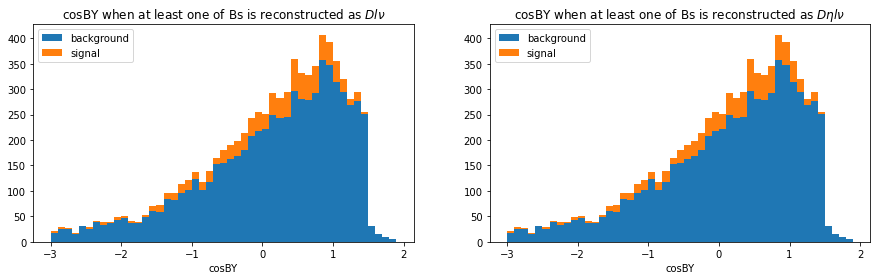

In [38]:
# cosBY for Dlnu
cosBY0p_Dl_sig = tree_p.loc['cut0'].loc['signal'].query('B0_decayModeID<500 or B1_decayModeID<500')['cosBY0']
cosBY1p_Dl_sig = tree_p.loc['cut0'].loc['signal'].query('B0_decayModeID<500 or B1_decayModeID<500')['cosBY1']
cosBYp_Dl_sig = pd.concat([cosBY0p_Dl_sig,cosBY1p_Dl_sig])

cosBY0p_Dl_bkg = tree_p.loc['cut0'].loc['background'].query('B0_decayModeID<500 or B1_decayModeID<500')['cosBY0']
cosBY1p_Dl_bkg = tree_p.loc['cut0'].loc['background'].query('B0_decayModeID<500 or B1_decayModeID<500')['cosBY1']
cosBYp_Dl_bkg = pd.concat([cosBY0p_Dl_bkg, cosBY1p_Dl_bkg])

# cosBY for Detalnu
cosBY0p_Detal_sig = tree_p.loc['cut0'].loc['signal'].query('abs(B0_decayModeID-1650)<60 or abs(B1_decayModeID-1650)<60')['cosBY0']
cosBY1p_Detal_sig = tree_p.loc['cut0'].loc['signal'].query('abs(B0_decayModeID-1650)<60 or abs(B1_decayModeID-1650)<60')['cosBY1']
cosBYp_Detal_sig = pd.concat([cosBY0p_Detal_sig,cosBY1p_Detal_sig])

cosBY0p_Detal_bkg = tree_p.loc['cut0'].loc['background'].query('abs(B0_decayModeID-1650)<60 or abs(B1_decayModeID-1650)<60')['cosBY0']
cosBY1p_Detal_bkg = tree_p.loc['cut0'].loc['background'].query('abs(B0_decayModeID-1650)<60 or abs(B1_decayModeID-1650)<60')['cosBY1']
cosBYp_Detal_bkg = pd.concat([cosBY0p_Detal_bkg, cosBY1p_Detal_bkg])


# plt.figure(figsize=(15, 4))
# ax_log = plt.subplot(121)
# count, bins, _ = ax_log.hist([cosBY0p_bkg, cosBY0p_sig], label=['background', 'signal'], bins=50)
# ax_log.set_yscale('log')
# print(count[0])

plt.figure(figsize=(15, 4))
ax_linear = plt.subplot(121)
count_cosBYp_Dl, binedges_cosBYp_Dl, _ = ax_linear.hist([cosBYp_Dl_bkg, cosBYp_Dl_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(-3,2,0.1))
plt.xlabel('cosBY')
plt.title(r'cosBY when at least one of Bs is reconstructed as $Dl\nu$')
plt.legend()

ax_linear = plt.subplot(122)
count_cosBYp_Detal, binedges_cosBYp_Detal, _ = ax_linear.hist([cosBYp_Detal_bkg, cosBYp_Detal_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(-3,2,0.1))
plt.xlabel('cosBY')
plt.title(r'cosBY when at least one of Bs is reconstructed as $D\eta l\nu$')
plt.legend()


#### The idea is to define a for loop to find the ratio of signal to background in different parts of the above histogram.

In [48]:
window=[2,4,6,8,12,16,20,26,32,40,48]
# plt.figure(figsize=(15,10))
# plt.subplot(211)
x_cosBYp_Dl, s_cosBYp_Dl, r_cosBYp_Dl= get_x_ratio(window, count_cosBYp_Dl)

            
#plt.grid(True)
# plt.title('BY0')
# plt.legend()
# x = np.random.rand(5, 8)*.7
# plt.table(cellText=[['%.2f' % xxx for xxx in xx] for xx in x_range.items()],cellColours=plt.cm.GnBu(x),loc='bottom')
 
# plt.show()

# plt.figure(figsize=(15,10))
# plt.subplot(212)
# x_BY1, s_BY1, r_BY1, p_BY1 = get_x_ratio(window, count_BY1)
# plt.title('BY1')
# plt.legend()

In [45]:
x_range = x_ranges(window, x_cosBYp_Dl, binedges_cosBYp_Dl)
len(x_range[2])

28

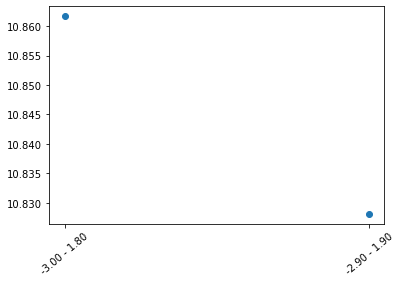

In [50]:
fig, ax = plt.subplots()
plt.plot(x_range[48], s_cosBYp_Dl[48], 'o')
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=40, labelsize=10)


In [ ]:
len(bins_BY0)

Text(0, 0.5, 'significance')

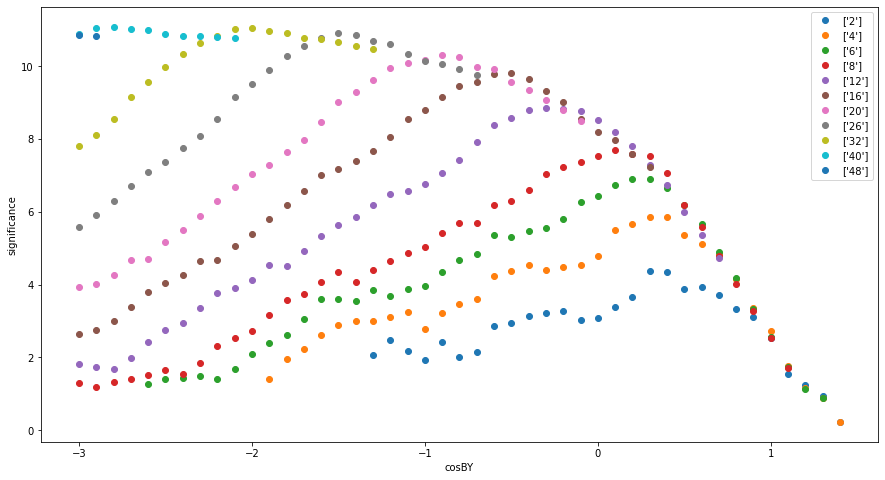

In [51]:
for width in window:
    for i in range(48):
        if len(s_cosBYp_Dl[width])<48:
            s_cosBYp_Dl[width].append(np.nan)
plt.figure(figsize=(15, 8))
for width in window:
    plt.plot(binedges_cosBYp_Dl[:48], s_cosBYp_Dl[width], 'o', label=[f'{width}'])
    plt.legend()
plt.xlabel("cosBY")
plt.ylabel('significance')

In [ ]:
print(len(count_BY0[0]))
print(bins_BY0[15],bins_BY0[32])
print(bins_BY1[5],bins_BY1[8])

In [ ]:
plt.hist(cosBY0p_sig, bins=5)

In [ ]:
# pion
api0true_InvM=pd.concat([aTree.query(cand0+AND+pi0true0)["pi4_B0_InvM"],
                    aTree.query(cand0+AND+pi0true1)["pi4_B1_InvM"]])
api0false_InvM=pd.concat([aTree.query(cand0+AND+pi0wide0+AND+NOT+pi0true0)["pi4_B0_InvM"],
                     aTree.query(cand0+AND+pi0wide1+AND+NOT+pi0true1)["pi4_B1_InvM"]])

api0true_InvM_new=pd.concat([aTree.query(cand0+AND+BpBmcut+AND+y4scuts+AND+pi0true0)["pi4_B0_InvM"],
                    aTree.query(cand0+AND+BpBmcut+AND+y4scuts+AND+pi0true1)["pi4_B1_InvM"]])
api0false_InvM_new=pd.concat([aTree.query(cand0+AND+pi0wide0+AND+NOT+pi0true0)["pi4_B0_InvM"],
                     aTree.query(cand0+AND+pi0wide1+AND+NOT+pi0true1)["pi4_B1_InvM"]])

# eta
aetatrue_InvM=pd.concat([aTree.query(cand0+AND+etatrue0)["pi4_B0_InvM"],
                   aTree.query(cand0+AND+etatrue1)["pi4_B1_InvM"]])
aetafalse_InvM=pd.concat([aTree.query(cand0+AND+etawide0+AND+NOT+etatrue0)["pi4_B0_InvM"],
                   aTree.query(cand0+AND+etawide1+AND+NOT+etatrue1)["pi4_B1_InvM"]])

aetatrue_InvM_new=pd.concat([aTree.query(cand0+AND+etatrue0)["pi4_B0_InvM"],
                   aTree.query(cand0+AND+etatrue1)["pi4_B1_InvM"]])
aetafalse_InvM_new=pd.concat([aTree.query(cand0+AND+etawide0+AND+NOT+etatrue0)["pi4_B0_InvM"],
                   aTree.query(cand0+AND+etawide1+AND+NOT+etatrue1)["pi4_B1_InvM"]])


plt.figure(figsize=(15,4))
plt.subplot(121)
bin_values_pi0, edges_pi0, _ = plt.hist([api0false_InvM,api0true_InvM], bins=np.linspace(0.090, 0.174, 22), 
                                histtype="barstacked", label=["nCand false","nCand true"])
plt.xlabel('InvMass (GeV)')
plt.title('pion')
plt.legend()

plt.subplot(122)
bin_values_eta, edges_eta, _ = plt.hist([aetafalse_InvM,aetatrue_InvM], bins=np.linspace(0.430, 0.650, 12), 
                                histtype="barstacked", label=["nCand false","nCand true"])
plt.xlabel('InvMass (GeV)')
plt.title('eta')
plt.legend()

#print(f"rms of true pi0  {np.std(api0true):.3f},    rms of true eta  {np.std(aetatrue):.3f}")

In [ ]:
print('background: ', bin_values_pi0[0][0:2])
print('signal: ', bin_values_pi0[1][0:2])

print('sum background: ', sum_of_list(bin_values_pi0[0][0:2]))
print('sum signal: ', sum_of_list(bin_values_pi0[1][0:2]))
print(sum_of_list(bin_values_pi0[1][0:2]-bin_values_pi0[0][0:2]))

In [ ]:
plt.plot(np.arange(21), bin_values_pi0[1])

In [ ]:
# testing get_x_ratio function
print(len(bin_values_pi0[0]))
window = [2, 3, 6, 8, 20]
x, s, r, p = get_x_ratio(window, bin_values_pi0)
plt.legend()

In [ ]:
print(f'the min value of the InvM of pi0: {edges_pi0[7]}\nthe max value of the InvM of pi0: {edges_pi0[14]}')

In [ ]:
etaECMa=aTree.query(roecuts+AND+y4scuts+AND+etacut+AND+cand0)['pi4_0_B0_ECM']
etaECMb=aTree.query(roecuts+AND+y4scuts+AND+etacut+AND+cand0)['pi4_1_B0_ECM']
etaECMc=aTree.query(roecuts+AND+y4scuts+AND+etacut+AND+cand0)['pi4_0_B1_ECM']
etaECMd=aTree.query(roecuts+AND+y4scuts+AND+etacut+AND+cand0)['pi4_1_B1_ECM']
etaECM0=pd.concat([etaECMa,etaECMc])
etaECM1=pd.concat([etaECMb,etaECMd])
etatrueECMa=aTree.query(roecuts+AND+y4scuts+AND+etatrue+AND+cand0)['pi4_0_B0_ECM']
etatrueECMb=aTree.query(roecuts+AND+y4scuts+AND+etatrue+AND+cand0)['pi4_1_B0_ECM']
etatrueECMc=aTree.query(roecuts+AND+y4scuts+AND+etatrue+AND+cand0)['pi4_0_B1_ECM']
etatrueECMd=aTree.query(roecuts+AND+y4scuts+AND+etatrue+AND+cand0)['pi4_1_B1_ECM']
etatrueECM0=pd.concat([etatrueECMa,etatrueECMc])
etatrueECM1=pd.concat([etatrueECMb,etatrueECMd])
etaECMsum=etaECM0+etaECM1
etaECMdif=abs(etaECM0-etaECM1)
etatrueECMsum=etatrueECM0+etatrueECM1
etatrueECMdif=abs(etatrueECM0-etatrueECM1)

my_etaECMa=aTree.query(y4scuts+AND+etacut+AND+cand0)['pi4_0_B0_ECM']
my_etaECMb=aTree.query(y4scuts+AND+etacut+AND+cand0)['pi4_1_B0_ECM']
my_etaECMc=aTree.query(y4scuts+AND+etacut+AND+cand0)['pi4_0_B1_ECM']
my_etaECMd=aTree.query(y4scuts+AND+etacut+AND+cand0)['pi4_1_B1_ECM']
my_etaECM0=pd.concat([etaECMa,etaECMc])
my_etaECM1=pd.concat([etaECMb,etaECMd])
my_etatrueECMa=aTree.query(y4scuts+AND+etatrue+AND+cand0)['pi4_0_B0_ECM']
my_etatrueECMb=aTree.query(y4scuts+AND+etatrue+AND+cand0)['pi4_1_B0_ECM']
my_etatrueECMc=aTree.query(y4scuts+AND+etatrue+AND+cand0)['pi4_0_B1_ECM']
my_etatrueECMd=aTree.query(y4scuts+AND+etatrue+AND+cand0)['pi4_1_B1_ECM']
my_etatrueECM0=pd.concat([etatrueECMa,etatrueECMc])
my_etatrueECM1=pd.concat([etatrueECMb,etatrueECMd])
my_etaECMsum=etaECM0+etaECM1
my_etaECMdif=abs(etaECM0-etaECM1)
my_etatrueECMsum=etatrueECM0+etatrueECM1
my_etatrueECMdif=abs(etatrueECM0-etatrueECM1)

plt.figure(figsize=(15,10))
plt.subplot(221)
h_values, xedges, yedges, _ = plt.hist2d(etaECMsum, etaECMdif, list(np.arange(0,1.2,0.05)))
plt.xlabel('sum')
plt.ylabel('dif')
plt.colorbar()
plt.title('etaECM')
#plt.legend()

plt.subplot(222)
h_values, xedges, yedges, _ = plt.hist2d(etatrueECMsum, etatrueECMdif, list(np.arange(0,1.2,0.05)))
plt.xlabel('sum')
plt.ylabel('dif')
plt.title('etatrueECM')
plt.colorbar()
#plt.legend()

plt.subplot(223)
h_values, xedges, yedges, _ = plt.hist2d(my_etaECMsum, my_etaECMdif, list(np.arange(0,1.2,0.05)))
plt.xlabel('sum')
plt.ylabel('dif')
plt.colorbar()
plt.title('etaECM')

plt.subplot(224)
h_values, xedges, yedges, _ = plt.hist2d(my_etatrueECMsum, my_etatrueECMdif, list(np.arange(0,1.2,0.05)))
plt.xlabel('sum')
plt.ylabel('dif')
plt.title('etatrueECM')
plt.colorbar()

plt.show()

$ $
$ $

Try to see if there is discrimination in other variables; not so much.  In any case, we have to be careful about using kinematics to discriminate since the D(\*) eta lnu production model (phase space) is almost certainly very wrong.

In [ ]:
etamodesBp = list((1019,1020,1039,1040,101019,101020,101039,101040,201019,201020,201039,201040))
etamodesBm = [-x for x in etamodesBp]
etamodesBpBm = etamodesBp + etamodesBm

etamodesB0 = list((1017,1018,1035,1036,101017,101018,101035,101036,201017,201018,201035,201036))
etamodesB0bar = [-x for x in etamodesB0]
etamodesB0B0 = etamodesB0 + etamodesB0bar

print(f'{-101019 in etamodesBpBm}  {1002 in etamodesB0B0}')
geneta=f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) )'

In [ ]:
DpCM0=aTree.query(y4scuts+AND+etacut+AND+NOT+etatrue+AND+cand0)['D_B0_pCM']
DpCM1=aTree.query(y4scuts+AND+etacut+AND+NOT+etatrue+AND+cand0)['D_B1_pCM']
DpCMpkbg0=aTree.query(y4scuts+AND+etacut+AND+etatrue+AND+NOT+
                     f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                     cand0)['D_B0_pCM']
DpCMpkbg1=aTree.query(y4scuts+AND+etacut+AND+etatrue+AND+NOT+
                     f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                     cand0)['D_B1_pCM']
DtruepCM0=aTree.query(y4scuts+AND+etatrue+AND+cand0)['D_B0_pCM']
DtruepCM1=aTree.query(y4scuts+AND+etatrue+AND+cand0)['D_B1_pCM']

epCM0=aTree.query(y4scuts+AND+etacut+AND+NOT+etatrue+AND+cand0)['e_B0_pCM']
epCM1=aTree.query(y4scuts+AND+etacut+AND+NOT+etatrue+AND+cand0)['e_B1_pCM']
epCMpkbg0=aTree.query(y4scuts+AND+etacut+AND+etatrue+AND+NOT+
                     f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                     cand0)['e_B0_pCM']
epCMpkbg1=aTree.query(y4scuts+AND+etacut+AND+etatrue+AND+NOT+
                     f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                     cand0)['e_B1_pCM']
etruepCM0=aTree.query(y4scuts+AND+etatrue+AND+cand0)['e_B0_pCM']
etruepCM1=aTree.query(y4scuts+AND+etatrue+AND+cand0)['e_B1_pCM']


plt.figure(figsize=(15,4))
plt.subplot(131)
h_values, xedges, yedges, _ = plt.hist2d(epCM0, epCM1, list(np.arange(0,2.5,0.2)),
                                vmin=0,vmax=6, label=["p_e vs p_e, comb eta"])
plt.xlabel('epCM0')
plt.ylabel('epCM1')
plt.title('we do not have true eta')

plt.subplot(132)
h_values, xedges, yedges, _ = plt.hist2d(epCMpkbg0, epCMpkbg1, list(np.arange(0,2.5,0.2)),
                                vmin=0,vmax=6, label=["p_e vs p_e, pkg eta"])
plt.xlabel('epCMpkbg0')
plt.ylabel('epCMpkbg1')
plt.title('we have true eta but \n we asked one of the Bs should not have eta')

plt.subplot(133)
h_values, xedges, yedges, _ = plt.hist2d(etruepCM0, etruepCM1, list(np.arange(0,2.5,0.2)),
                                vmin=0,vmax=6, label=["p_e vs p_e, signal eta"])
plt.xlabel('etruepCM0')
plt.ylabel('etruepCM1')
plt.title('we have true eta')
plt.colorbar()

plt.figure(figsize=(15,4))
plt.subplot(131)
h_values, xedges, yedges, _ = plt.hist2d(DpCM0, DpCM1, list(np.arange(0,2.5,0.2)),
                                         vmin=0,vmax=6,label=["p_D0 vs p_D1 comb eta"])
plt.xlabel('DpCM0')
plt.ylabel('DpCM1')

plt.subplot(132)
h_values, xedges, yedges, _ = plt.hist2d(DpCMpkbg0, DpCMpkbg1, list(np.arange(0,2.5,0.2)),
                                         vmin=0,vmax=6,label=["p_D0 vs p_D1 pkg eta"])
plt.xlabel('DpCMpkbg0')
plt.ylabel('DpCMpkbg1')

plt.subplot(133)
h_values, xedges, yedges, _ = plt.hist2d(DtruepCM0, DtruepCM1, list(np.arange(0,2.5,0.2)),
                                         vmin=0,vmax=6,label=["p_D0 vs p_D1 signal eta"])
plt.xlabel('DtruepCM0')
plt.ylabel('DtruepCM1')
plt.colorbar()

In [ ]:
Tree.query('abs(B0_decayModeID-1550)<160')['B0_decayModeID'].value_counts()

In [ ]:
recon0=aTree.query(roecuts+AND+y4scuts+AND+etawide+AND+NOT+etatrue+AND+'(pi4_0_B0_PDG==22 or pi4_0_B1_PDG==22)'+AND+
                  '((abs(B0_decayModeID-1550)<160 or B0_decayModeID>2399) or (abs(B1_decayModeID-1550)<160 or B1_decayModeID>2399))'+AND+
                  f'( not ((aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) ))'+AND+
                  cand0)["pi4_B0_InvM"]
recon1=aTree.query(roecuts+AND+y4scuts+AND+etawide+AND+NOT+etatrue+AND+'(pi4_0_B0_PDG==22 or pi4_0_B1_PDG==22)'+AND+
                  '((abs(B0_decayModeID-1550)<160 or B0_decayModeID>2399) or (abs(B1_decayModeID-1550)<160 or B1_decayModeID>2399))'+AND+
                  f'( not ((aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) ))'+AND+
                  cand0)["pi4_B1_InvM"]
recon=pd.concat([recon0,recon1])
recon3=aTree.query(roecuts+AND+y4scuts+AND+etawide+AND+etatrue+AND+'(pi4_0_B0_PDG==22 or pi4_0_B1_PDG==22)'+AND+
                  '((abs(B0_decayModeID-1550)<160 or B0_decayModeID>2399) or (abs(B1_decayModeID-1550)<160 or B1_decayModeID>2399))'+AND+
                  f'( not ((aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) ))'+AND+
                  cand0)["pi4_B0_InvM"]
recon4=aTree.query(roecuts+AND+y4scuts+AND+etawide+AND+etatrue+AND+'(pi4_0_B0_PDG==22 or pi4_0_B1_PDG==22)'+AND+
                  '((abs(B0_decayModeID-1550)<160 or B0_decayModeID>2399) or (abs(B1_decayModeID-1550)<160 or B1_decayModeID>2399))'+AND+
                  f'( not ((aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) ))'+AND+
                  cand0)["pi4_B1_InvM"]
reconpkgbkg=pd.concat([recon3,recon4])
recontrue0=aTree.query(roecuts+AND+y4scuts+AND+etawide+AND+'(pi4_0_B0_PDG==22 or pi4_0_B1_PDG==22)'+AND+
                  '((abs(B0_decayModeID-1550)<160 or B0_decayModeID>2399) or (abs(B1_decayModeID-1550)<160 or B1_decayModeID>2399))'+AND+
                  f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                      cand0)["pi4_B0_InvM"]
recontrue1=aTree.query(roecuts+AND+y4scuts+AND+etawide+AND+'(pi4_0_B0_PDG==22 or pi4_0_B1_PDG==22)'+AND+
                  '((abs(B0_decayModeID-1550)<160 or B0_decayModeID>2399) or (abs(B1_decayModeID-1550)<160 or B1_decayModeID>2399))'+AND+
                  f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) | (aB0Mode in {etamodesB0B0}) | (aBbar0Mode in {etamodesB0B0}) )'+AND+
                      cand0)["pi4_B1_InvM"]
recontrue=pd.concat([recontrue0,recontrue1])
plt.figure(figsize=(12,4))
bin_values, edges, _ = plt.hist([recon,reconpkgbkg,recontrue], bins=np.linspace(0.430, 0.650, 12), 
                                histtype="barstacked", label=["combbkg","peakingbkg","signal"])
plt.title('eta mass distribution with cand0(__candidate__==0)')
plt.xlabel('pi4_B_InvM')
plt.legend()
#which is the green part
print(f'Number of true  selected D(\*) eta l nu expected in 360 fb-1= {sum(bin_values[2]-bin_values[1])*360/mclumi:.2f}')
#which is the orange part
print(f'Number of pkg bkg        D(\*) eta l nu expected in 360 fb-1= {sum(bin_values[1]-bin_values[0])*360/mclumi:.2f}')
#which is the sum of green, orange, and blue. but because in barstacked green hs higher values we only choose green because it has all the rest.
print(f'Number of total selected D(\*) eta l nu expected in 360 fb-1 = {sum(bin_values[2])*360/mclumi:.2f}')
print(f'Statistical significance = {sum(bin_values[2]-bin_values[1])*360/mclumi / pow(sum(bin_values[2])*360/mclumi,0.5):.2f}')
